In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)
headers = ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns = headers
# df.to_excel("Medical_Insurance_Data.xlsx")

df.replace("?", np.nan, inplace= True)

is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

df[['charges']] = np.round(df[['charges']],2)

sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

sns.boxplot(x="smoker", y="charges", data=df)

X = df[['smoker']]
Y = df[['charges']]
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

Z = df[['age','gender','bmi','no_of_children','smoker','region']]
lm.fit(Z,Y)
lm.score(Z,Y)

input_1 = [('scale',StandardScaler()),('polynomial'),(PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(input_1)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
r2_score(Y,ypipe)



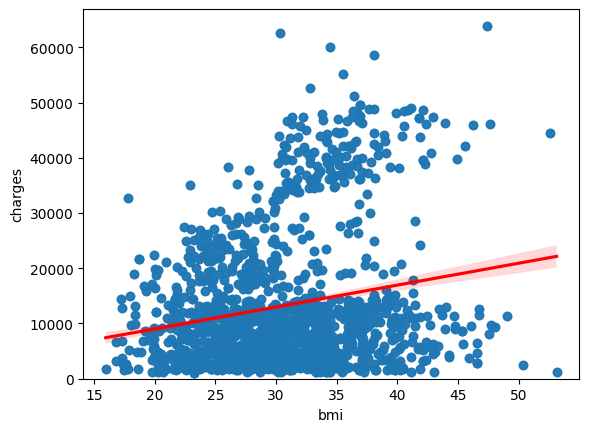

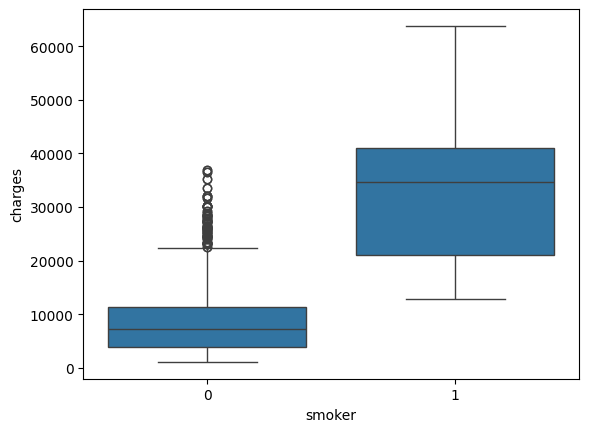

0.6221791733924185
0.7504083820289634
R2 Score: 0.8451241594834438


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

# Load the dataset
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)
headers = ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns = headers

# Replace '?' with NaN and fill missing values
df.replace("?", np.nan, inplace=True)
df["smoker"].fillna(df['smoker'].value_counts().idxmax(), inplace=True)
df["age"].fillna(df['age'].astype('float').mean(axis=0), inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")
df[['charges']] = np.round(df[['charges']], 2)

# Visualize data
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)
plt.show()

sns.boxplot(x="smoker", y="charges", data=df)
plt.show()

# Simple linear regression
X = df[['smoker']]
Y = df[['charges']]
lm = LinearRegression()
lm.fit(X, Y)
print(lm.score(X, Y))

# Multiple linear regression
Z = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
lm.fit(Z, Y)
print(lm.score(Z, Y))

# Polynomial regression pipeline
input_1 = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

pipe = Pipeline(input_1)
Z = Z.astype(float)
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)
r2 = r2_score(Y, ypipe)

print("R2 Score:", r2)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

df = pd.read_csv(filepath)
df.to_excel('HouseSalesUSA.xlsx')
df.head(10)

df.drop(columns=['id','Unnamed: 0'], inplace=True)
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

# Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 



In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
Z = df[features]
input_1 = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]
pipe = Pipeline(input_1)
pipe.fit(features,Y)
ypipe = pipe.predict(features)
r2 = r2_score(features,ypipe)

feature_columns = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
Z = df[feature_columns]
Y = df['price']
input_1 = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(input_1)
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)
r2 = r2_score(Y, ypipe)